In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score #metrices
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation

In [ ]:
df = pd.read_csv("Datasets\projectairqi_data.csv")
print(df)

          No  year  month  day  hour   PM2.5    PM10    SO2    NO2     CO  \
0          1  2015      1    1     5  454.58  976.99   6.17  37.41  26.19   
1          2  2015      1    1     6  454.58  862.23   7.33  32.06  11.04   
2          3  2015      1    1     7  454.58  731.83   8.00  30.97   8.39   
3          4  2015      1    1     8  454.58  725.74   9.00  26.83   7.89   
4          5  2015      1    1     9  454.58  656.93   6.67  26.22   4.25   
...      ...   ...    ...  ...   ...     ...     ...    ...    ...    ...   
35064  35065  2019      1    1     5  340.12  502.34  12.48  56.89   2.24   
35065  35066  2019      1    1     6  311.52  463.44  11.83  54.22   1.93   
35066  35067  2019      1    1     7  291.18  435.31  11.58  53.41   2.09   
35067  35068  2019      1    1     8  283.30  435.38  11.74  56.00   2.09   
35068  35069  2019      1    1     9  295.93  472.34  14.11  71.17   2.11   

          O3   TEMP   PRES  DEWP  RAIN      wd  WSPM  
0      16.00   8.41 

In [ ]:

print(df.shape)

(35069, 17)


In [ ]:

df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5     375
PM10     2418
SO2      2852
NO2       330
CO        364
O3       2201
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
dtype: int64

In [ ]:

df = df.dropna()
print(df.shape)

(31468, 17)


In [ ]:

x_train = df[:22027] 
y_train = x_train['PM2.5']
x_test = df[22027:31468] 
y_test = x_test['PM2.5']


In [ ]:
print(x_train.head())
print(x_train.shape)
print(y_train.head())
print(y_train)

   No  year  month  day  hour   PM2.5    PM10   SO2    NO2     CO     O3  \
0   1  2015      1    1     5  454.58  976.99  6.17  37.41  26.19  16.00   
1   2  2015      1    1     6  454.58  862.23  7.33  32.06  11.04  12.33   
2   3  2015      1    1     7  454.58  731.83  8.00  30.97   8.39  58.67   
3   4  2015      1    1     8  454.58  725.74  9.00  26.83   7.89  13.42   
4   5  2015      1    1     9  454.58  656.93  6.67  26.22   4.25  55.30   

    TEMP   PRES  DEWP  RAIN      wd  WSPM  
0   8.41  99.26 -0.89   0.0  341.24  4.76  
1   8.07  99.31 -1.13   0.0  338.96  4.61  
2   9.61  99.38 -0.08   0.0  336.68  4.32  
3  13.13  99.47 -1.18   0.0  334.49  3.23  
4  15.64  99.52 -0.95   0.0  333.63  2.04  
(22027, 17)
0    454.58
1    454.58
2    454.58
3    454.58
4    454.58
Name: PM2.5, dtype: float64
0        454.58
1        454.58
2        454.58
3        454.58
4        454.58
          ...  
25623    205.52
25624    249.43
25625    298.85
25626    302.18
25627    350.57
Nam

In [ ]:
df.loc[22027:31468].count() / df.shape[0] * 100 

No       23.569976
year     23.569976
month    23.569976
day      23.569976
hour     23.569976
PM2.5    23.569976
PM10     23.569976
SO2      23.569976
NO2      23.569976
CO       23.569976
O3       23.569976
TEMP     23.569976
PRES     23.569976
DEWP     23.569976
RAIN     23.569976
wd       23.569976
WSPM     23.569976
dtype: float64

Double-click (or enter) to edit

In [ ]:

train_norm = x_train['PM2.5']


train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.51141949]
[0.51141949]
[0.51141949]
[0.51141949]
[0.51141949]


In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [ ]:

train_norm = train_norm[train_norm!=0]

In [ ]:

test_norm = x_test['PM2.5']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.49988833]
[0.4922053]
[0.49458763]
[0.48208037]
[0.42984768]


In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  2


In [ ]:

test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(22026,)
(9439,)


In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [ ]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)

n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 ...

 [[0.19065636]
  [0.22672093]
  [0.27691411]]

 [[0.22672093]
  [0.27691411]
  [0.33340573]]

 [[0.27691411]
  [0.33340573]
  [0.33721223]]]
[[[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 ...

 [[0.19065636]
  [0.22672093]
  [0.27691411]]

 [[0.22672093]
  [0.27691411]
  [0.33340573]]

 [[0.27691411]
  [0.33340573]
  [0.33721223]]]
[[[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 ...

 [[0.19065636]
  [0.22672093]
  [0.27691411]]

 [[0.22672093]
  [0.27691411]
  [0.33340573]]

 [[0.27691411]
  [0.33340573]
  [0.33721223]]]
[[[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.51141949]]

 [[0.51141949]
  [0.51141949]
  [0.5114194

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.49988833 0.4922053  0.49458763] 0.4820803740265928
[0.4922053  0.49458763 0.48208037] 0.42984767945682767
[0.49458763 0.48208037 0.42984768] 0.40136388677952983
[0.48208037 0.42984768 0.40136389] 0.4027486189901878
[0.42984768 0.40136389 0.40274862] 0.40073852384568426


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


adam = Adam(learning_rate=0.001)


model.compile(optimizer=adam, loss='mse', metrics=['mae', 'accuracy'])


lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [ ]:

hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, batch_size=64, callbacks=[lr_reducer], verbose=1)

Epoch 1/50
345/345 [==============================] - 10s 21ms/step - loss: 0.0050 - mae: 0.0442 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_mae: 0.0329 - val_accuracy: 1.0598e-04 - lr: 0.0010
Epoch 2/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0026 - mae: 0.0319 - accuracy: 4.5407e-05 - val_loss: 0.0013 - val_mae: 0.0239 - val_accuracy: 1.0598e-04 - lr: 0.0010
Epoch 3/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0023 - mae: 0.0286 - accuracy: 4.5407e-05 - val_loss: 9.2796e-04 - val_mae: 0.0217 - val_accuracy: 1.0598e-04 - lr: 0.0010
Epoch 4/50
345/345 [==============================] - 7s 20ms/step - loss: 0.0022 - mae: 0.0276 - accuracy: 4.5407e-05 - val_loss: 8.4893e-04 - val_mae: 0.0190 - val_accuracy: 1.0598e-04 - lr: 0.0010
Epoch 5/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0021 - mae: 0.0270 - accuracy: 4.5407e-05 - val_loss: 9.3756e-04 - val_mae: 0.0211 - val_accuracy: 1.0598e-04 - lr: 0.0010
Epoch 6

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy', 'lr'])


In [ ]:
import xgboost as xgb


yhat = model.predict(X_split_test)


yhat_reshaped = np.reshape(yhat, (yhat.shape[0], 1, yhat.shape[1]))
yhat_reshaped = np.repeat(yhat_reshaped, n_steps, axis=1)


X_test_reshaped = np.reshape(X_split_test, (X_split_test.shape[0], X_split_test.shape[1], 1))

X_test_combined = np.concatenate([X_test_reshaped, yhat_reshaped], axis=2)


xgb_model = xgb.XGBRegressor()
xgb_model.fit(np.reshape(X_test_combined, (X_test_combined.shape[0], -1)), np.reshape(y_split_test, (y_split_test.shape[0],)))


y_pred_combined = np.concatenate([X_test_reshaped, yhat_reshaped], axis=2)
y_pred_final = xgb_model.predict(np.reshape(y_pred_combined, (y_pred_combined.shape[0], -1)))

295/295 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def compute(x_train, x_test, var, model, lr_reducer, n_steps, n_features):
   
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(x_train[var].values.reshape(-1, 1))
    train_norm = train_norm[train_norm != 0]

    
    test_norm = scaler.transform(x_test[var].values.reshape(-1, 1))
    test_norm = test_norm[test_norm != 0]

  
    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    
    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, batch_size=64, callbacks=[lr_reducer], verbose=1)

    yhat = model.predict(X_split_test)

    # Metrics
    mse = mean_squared_error(y_split_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_split_test, yhat)
    mape = np.mean(np.abs((y_split_test - yhat) / y_split_test)) * 100
    r2 = r2_score(y_split_test, yhat)
    ia = 1 - np.sum(np.abs(y_split_test - yhat)) / np.sum(np.abs(y_split_test - np.mean(y_split_test)) + np.abs(yhat - np.mean(y_split_test)))

    print('MSE: %.5f' % mse)
    print('RMSE: %.5f' % rmse)
    print('MAE: %.5f' % mae)
    print('MAPE: %.5f%%' % mape)
    print('R-squared: %.5f' % r2)
    print('IA: %.5f' % ia)

   
    train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)[1]
    test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)[1]
    print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


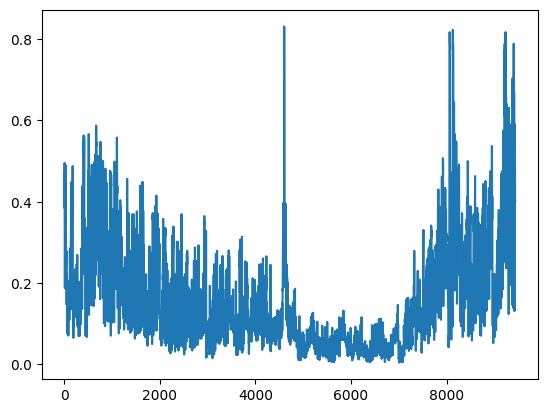

In [ ]:
plt.plot(y_pred_final)

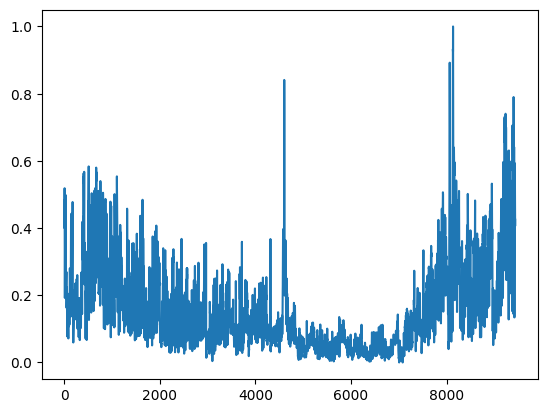

In [ ]:
plt.plot(y_split_test)

In [ ]:
train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)[1]
test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)[1]
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.02191, Test: 0.01674


dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy', 'lr'])


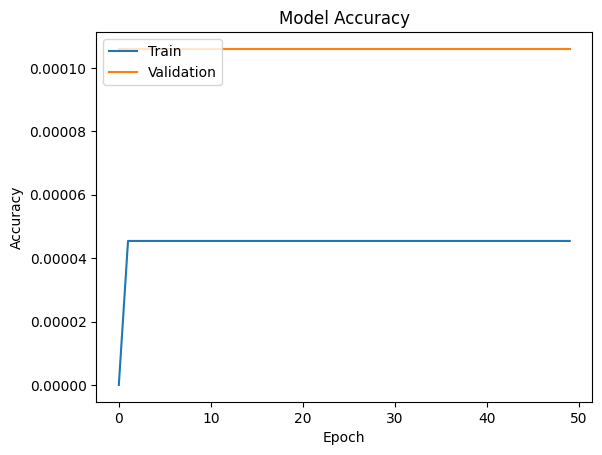

In [ ]:
import matplotlib.pyplot as plt


print(hist.history.keys())


plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


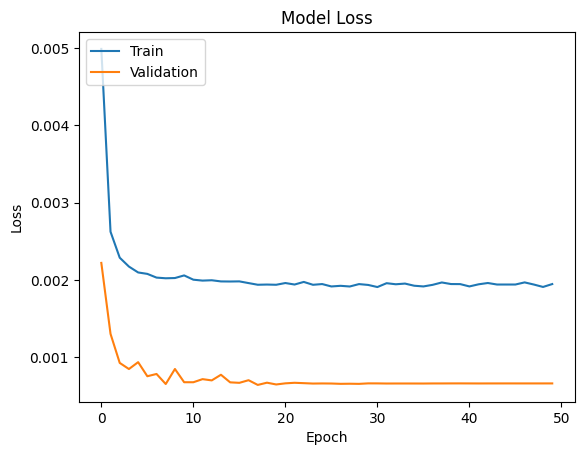

In [ ]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

   
    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, batch_size=64, callbacks=[lr_reducer], verbose=1)

    yhat = model.predict(X_split_test)

    
    mse = mean_squared_error(y_split_test, yhat)
    rmse = np.sqrt(mse)
    print('MSE: %.5f' % mse)
    print('RMSE: %.5f' % rmse)

    
    mae = mean_absolute_error(y_split_test, yhat)
    print('MAE: %.5f' % mae)

    
    mape = np.mean(np.abs((y_split_test - yhat) / y_split_test)) * 100
    print('MAPE: %.5f%%' % mape)

    
    r2 = r2_score(y_split_test, yhat)
    print('R-squared: %.5f' % r2)

   
    ia = 1 - np.sum(np.abs(np.array(yhat) - np.array(y_split_test))) / np.sum(y_split_test)
    print('IA: %.5f' % ia)

    train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)[1]
    test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)[1]
    print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0040 - mae: 0.0424 - accuracy: 4.5407e-05 - val_loss: 0.0014 - val_mae: 0.0236 - val_accuracy: 1.0597e-04 - lr: 6.1035e-08
Epoch 2/50
345/345 [==============================] - 5s 15ms/step - loss: 0.0040 - mae: 0.0422 - accuracy: 4.5407e-05 - val_loss: 0.0013 - val_mae: 0.0236 - val_accuracy: 1.0597e-04 - lr: 6.1035e-08
Epoch 3/50
345/345 [==============================] - 6s 18ms/step - loss: 0.0040 - mae: 0.0422 - accuracy: 4.5407e-05 - val_loss: 0.0013 - val_mae: 0.0235 - val_accuracy: 1.0597e-04 - lr: 6.1035e-08
Epoch 4/50
345/345 [==============================] - 7s 20ms/step - loss: 0.0040 - mae: 0.0422 - accuracy: 4.5407e-05 - val_loss: 0.0013 - val_mae: 0.0235 - val_accuracy: 1.0597e-04 - lr: 3.0518e-08
Epoch 6/50
345/345 [==============================] - 5s 13ms/step - loss: 0.0039 - mae: 0.0421 - accuracy: 4.5407e-05 - val_loss: 0.0013 - val_mae: 0.0235 - val_accuracy: 1.0597e-04 - lr: 3.0518e-08


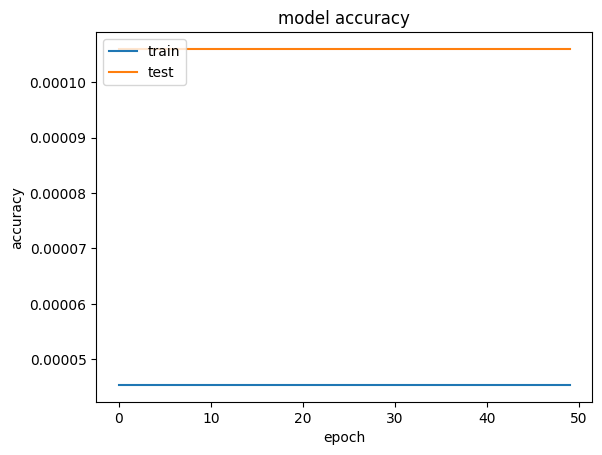

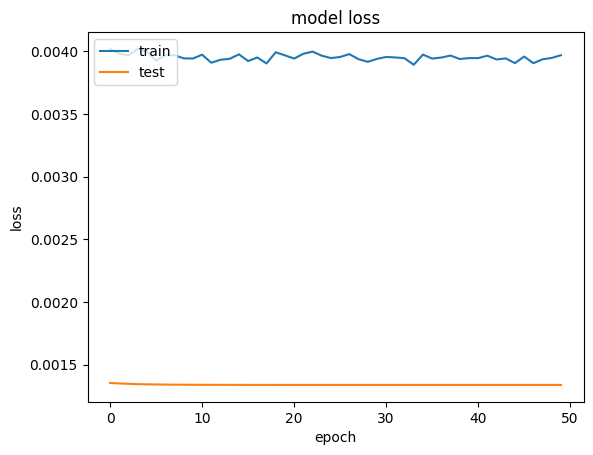

In [ ]:
compute('PM10')

Epoch 1/50
345/345 [==============================] - 6s 17ms/step - loss: 0.0014 - mae: 0.0222 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_mae: 0.0242 - val_accuracy: 1.0597e-04 - lr: 9.3132e-13
Epoch 2/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0014 - mae: 0.0223 - accuracy: 4.5407e-05 - val_loss: 0.0015 - val_mae: 0.0242 - val_accuracy: 1.0597e-04 - lr: 9.3132e-13
Epoch 3/50
345/345 [==============================] - 7s 20ms/step - loss: 0.0014 - mae: 0.0223 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_mae: 0.0242 - val_accuracy: 1.0597e-04 - lr: 9.3132e-13
Epoch 4/50
341/345 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0223 - accuracy: 4.5821e-05
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.656613094254636e-13.
345/345 [==============================] - 5s 14ms/step - loss: 0.0014 - mae: 0.0223 - accuracy: 4.5407e-05 - val_loss: 0.0015 - val_mae: 0.0242 - val_accuracy: 1.0597e-04 - lr: 9.3132e-13
Epoch 5/50
345/345 [=

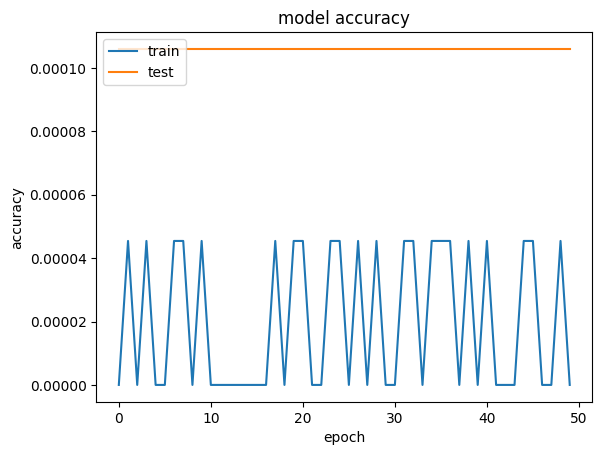

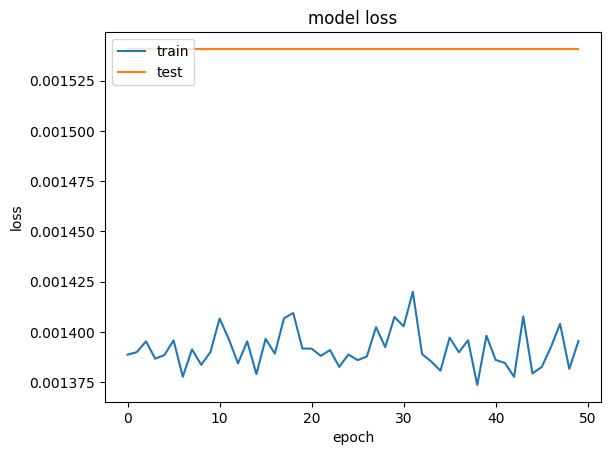

In [ ]:
compute('SO2')

Epoch 1/50
345/345 [==============================] - 6s 16ms/step - loss: 0.0017 - mae: 0.0266 - accuracy: 4.5411e-05 - val_loss: 0.0024 - val_mae: 0.0307 - val_accuracy: 1.0597e-04 - lr: 1.4211e-17
Epoch 2/50
345/345 [==============================] - 6s 18ms/step - loss: 0.0017 - mae: 0.0268 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_mae: 0.0307 - val_accuracy: 1.0597e-04 - lr: 1.4211e-17
Epoch 3/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0017 - mae: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_mae: 0.0307 - val_accuracy: 1.0597e-04 - lr: 1.4211e-17
Epoch 4/50
343/345 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0265 - accuracy: 4.5554e-05
Epoch 4: ReduceLROnPlateau reducing learning rate to 7.105427695090692e-18.
345/345 [==============================] - 7s 20ms/step - loss: 0.0017 - mae: 0.0266 - accuracy: 4.5411e-05 - val_loss: 0.0024 - val_mae: 0.0307 - val_accuracy: 1.0597e-04 - lr: 1.4211e-17
Epoch 5/50
345/345 [=

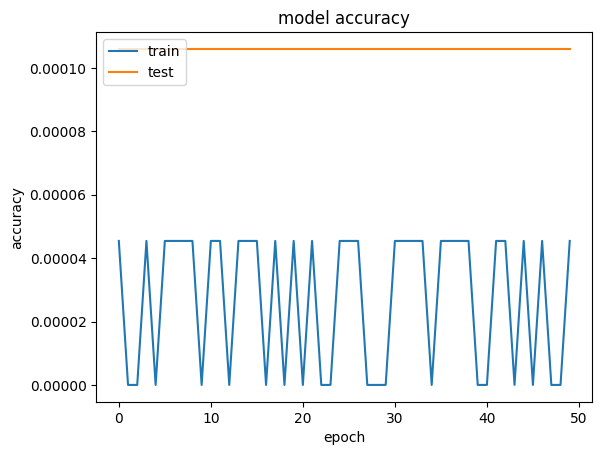

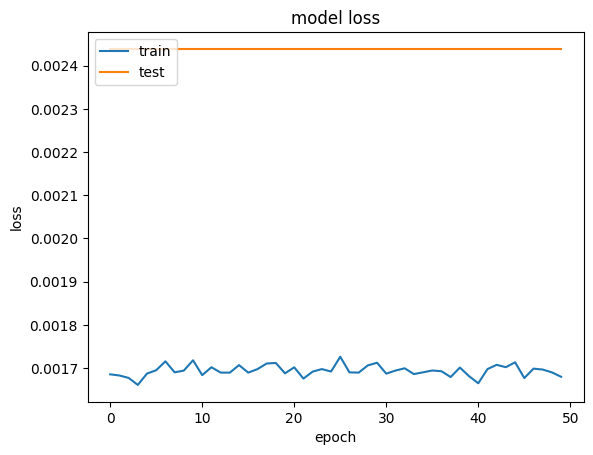

In [ ]:
compute('NO2')

Epoch 1/50
342/342 [==============================] - 5s 14ms/step - loss: 0.0018 - mae: 0.0251 - accuracy: 4.5811e-05 - val_loss: 0.0034 - val_mae: 0.0341 - val_accuracy: 1.0597e-04 - lr: 2.1684e-22
Epoch 2/50
342/342 [==============================] - 7s 20ms/step - loss: 0.0018 - mae: 0.0252 - accuracy: 4.5811e-05 - val_loss: 0.0034 - val_mae: 0.0341 - val_accuracy: 1.0597e-04 - lr: 2.1684e-22
Epoch 3/50
342/342 [==============================] - 5s 14ms/step - loss: 0.0018 - mae: 0.0250 - accuracy: 4.5811e-05 - val_loss: 0.0034 - val_mae: 0.0341 - val_accuracy: 1.0597e-04 - lr: 2.1684e-22
Epoch 4/50
338/342 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0251 - accuracy: 4.6228e-05
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0842022239823443e-22.
342/342 [==============================] - 5s 13ms/step - loss: 0.0018 - mae: 0.0251 - accuracy: 4.5811e-05 - val_loss: 0.0034 - val_mae: 0.0341 - val_accuracy: 1.0597e-04 - lr: 2.1684e-22
Epoch 5/50
342/342 [

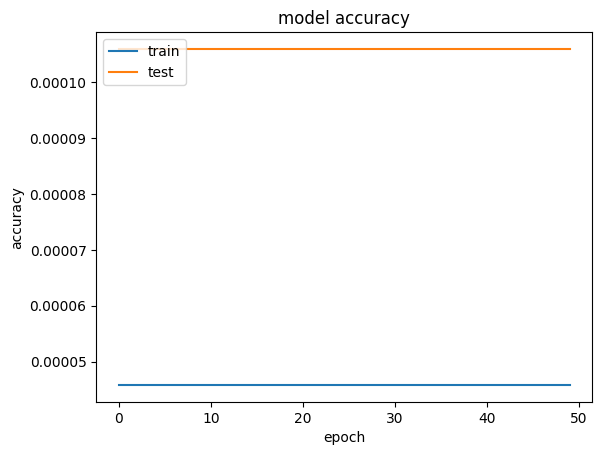

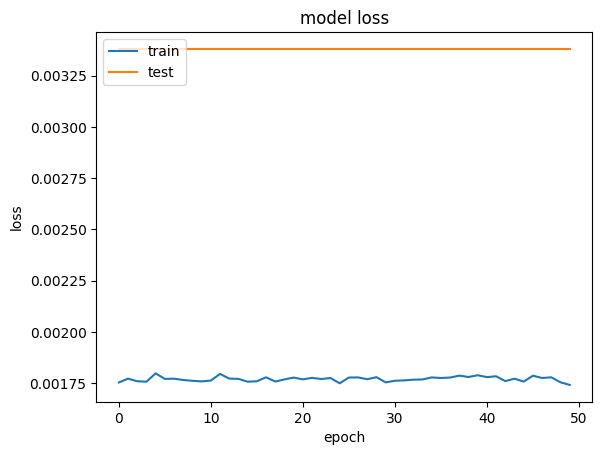

In [ ]:
compute('CO')

Epoch 1/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0013 - mae: 0.0215 - accuracy: 4.5407e-05 - val_loss: 0.0054 - val_mae: 0.0481 - val_accuracy: 1.0597e-04 - lr: 3.3087e-27
Epoch 2/50
345/345 [==============================] - 7s 20ms/step - loss: 0.0013 - mae: 0.0215 - accuracy: 4.5407e-05 - val_loss: 0.0054 - val_mae: 0.0481 - val_accuracy: 1.0597e-04 - lr: 3.3087e-27
Epoch 3/50
345/345 [==============================] - 5s 14ms/step - loss: 0.0013 - mae: 0.0214 - accuracy: 4.5407e-05 - val_loss: 0.0054 - val_mae: 0.0481 - val_accuracy: 1.0597e-04 - lr: 3.3087e-27
Epoch 4/50
343/345 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0214 - accuracy: 4.5554e-05
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.654361303683997e-27.
345/345 [==============================] - 6s 17ms/step - loss: 0.0013 - mae: 0.0214 - accuracy: 4.5407e-05 - val_loss: 0.0054 - val_mae: 0.0481 - val_accuracy: 1.0597e-04 - lr: 3.3087e-27
Epoch 5/50
345/345 [=

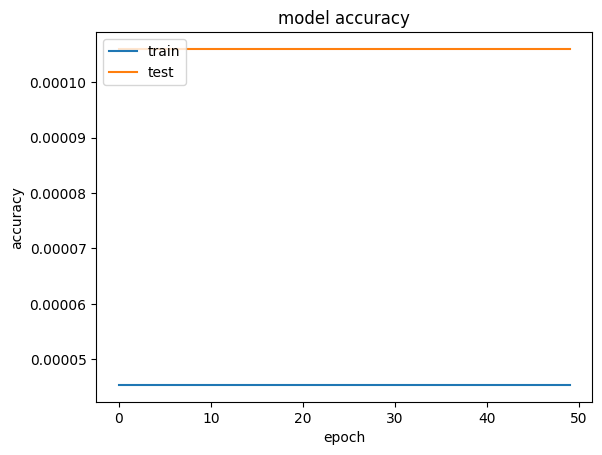

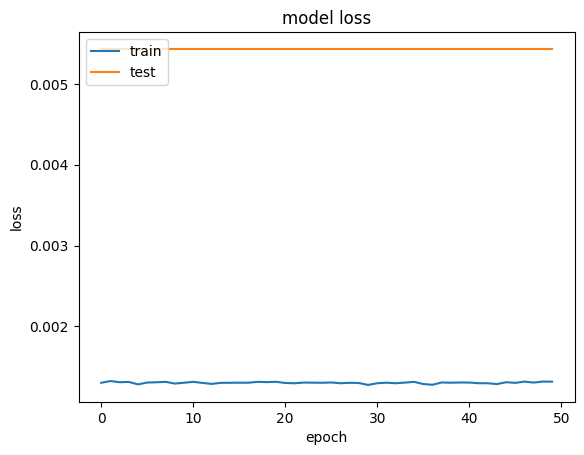

In [ ]:
compute('O3')

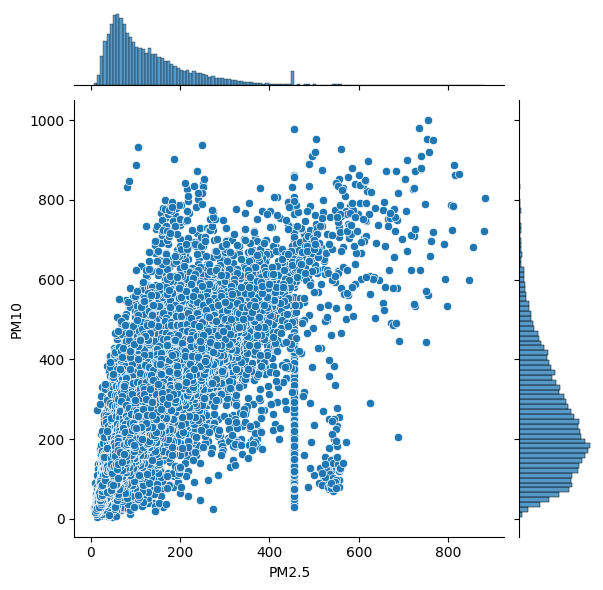

In [ ]:
sns.jointplot(x=df['PM2.5'], y=df['PM10'], data = df)

The above plot gives us the idea that these two conentrations are positively correlated with very few outliers.

<Axes: >

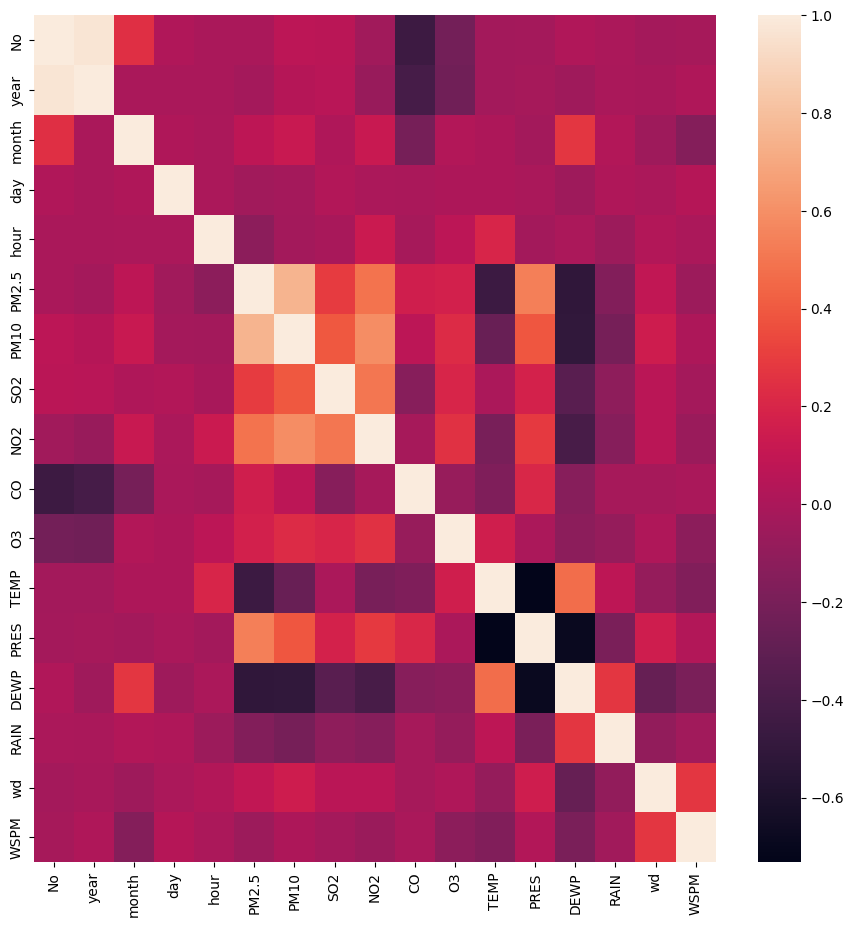

In [ ]:
#finding correlation
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

<Axes: xlabel='PM2.5', ylabel='PM10'>

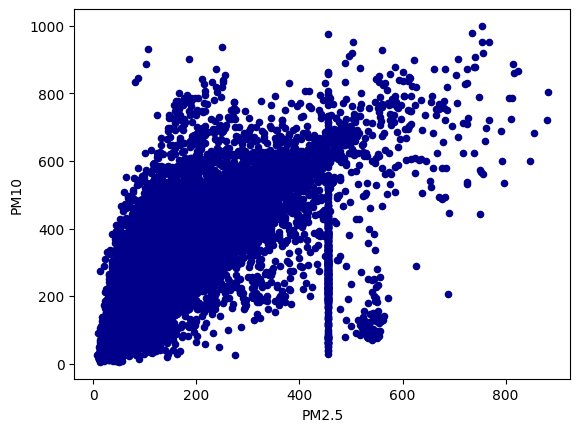

<Axes: xlabel='PM2.5', ylabel='PM10'>

In [ ]:
df.plot.scatter(x='PM2.5', y='PM10', c='DarkBlue')

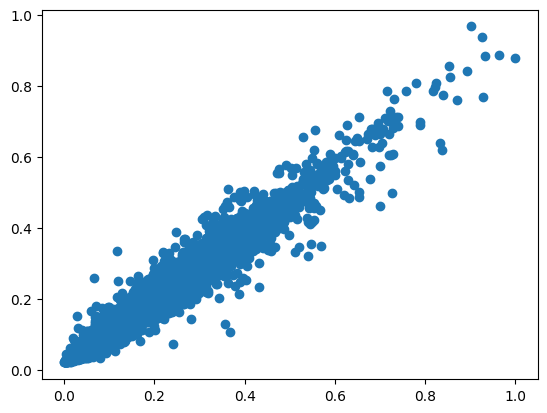

In [ ]:
plt.scatter(y_split_test, yhat)


Double-click (or enter) to edit

<Axes: xlabel='PM10', ylabel='SO2'>

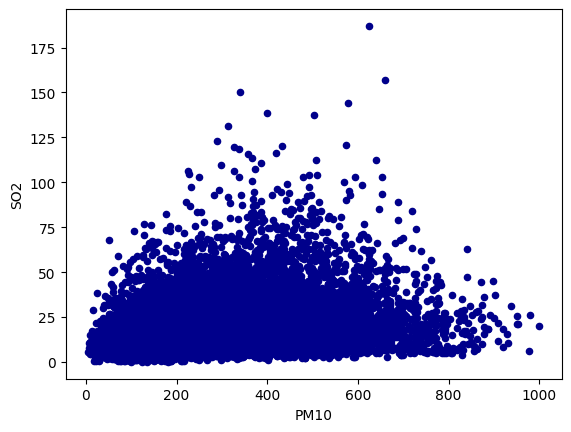

In [ ]:
df.plot.scatter(x='PM10', y='SO2', c='DarkBlue')

<Axes: xlabel='SO2', ylabel='NO2'>

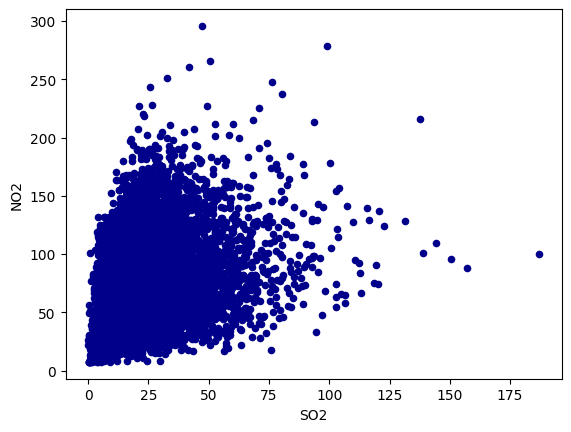

In [ ]:
df.plot.scatter(x='SO2', y='NO2', c='DarkBlue')

<Axes: xlabel='NO2', ylabel='CO'>

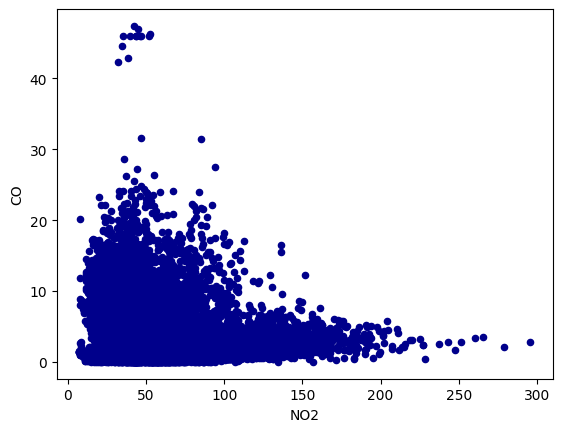

In [ ]:
df.plot.scatter(x='NO2', y='CO', c='DarkBlue')

<Axes: xlabel='CO', ylabel='O3'>

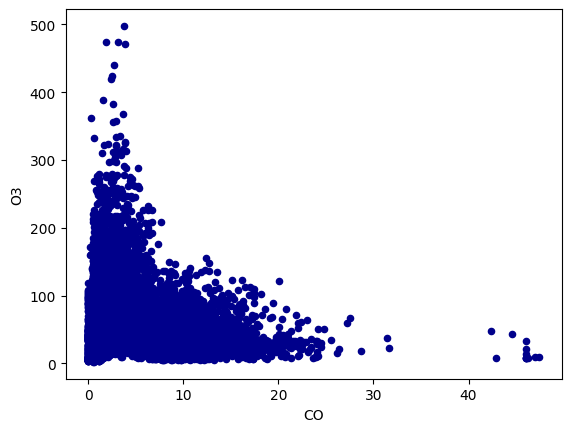

In [ ]:
df.plot.scatter(x='CO', y='O3', c='DarkBlue')

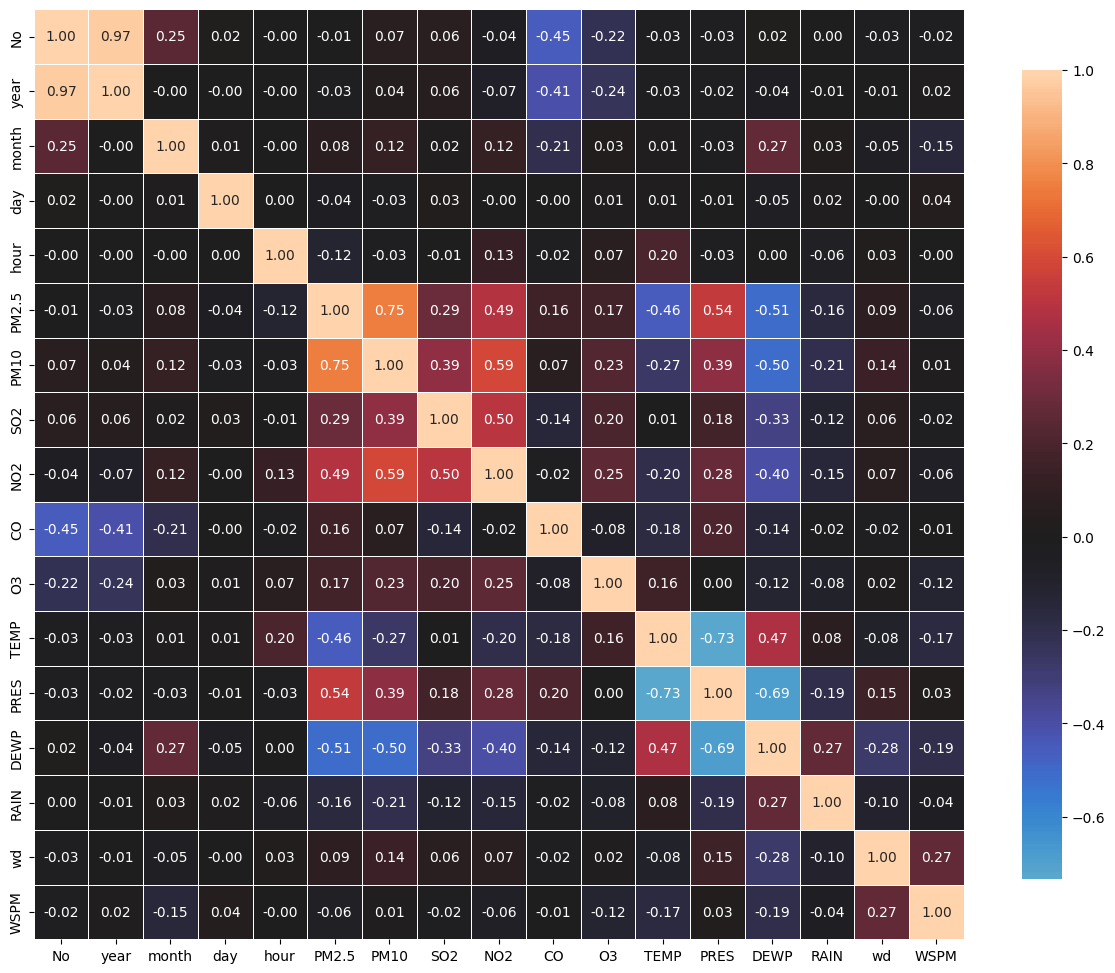

In [ ]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();